In [36]:
#Instalamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#Importamos el datasets a analizar
avion_df = pd.read_csv('AccidentesAviones.csv', sep=',', encoding='utf-8')
avion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [38]:
avion_df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [39]:
#Reemplazo los valores '?' por Nan para saber cuantos valores nulos hay por columna
avion_df.replace('?', np.nan, inplace=True)

avion_df.isnull().sum()


Unnamed: 0                   0
fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      762
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [40]:
# Para unas buenas prácticas, vamos a modificar los titulos a un solo idioma
new_name = {'fecha' : 'date',
            'HORA declarada' : 'time',
            'Ruta' : 'location',
            'OperadOR' : 'operator',
            'PASAJEROS A BORDO' : 'passengers_aboard',
            'cantidad de fallecidos' : 'total_fatalities'
            }
avion_df = avion_df.rename(columns=new_name)
avion_df.head()

,Unnamed: 0,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


## DICCIONARIO
- Date - Date of accident
- Time - Local time, in 24 hr. in the format hh:mm
- Location - Location of the accident
- Operator - Airline or operator of the aircraft
- Flight - Flight number assigned by the aircraft operator
- Route - Complete or partial route flown prior to the accident
- Type - Aircraft type
- Registration - ICAO registration of the aircraft
- cn/In - Construction or serial number / Line or fuselage number
- Total Aboard - Total people aboard
- Passengers Aboard - Passengers aboard
- Crew Aboard - Crew aboard
- Total Fatalities - Total fatalities
- Passengers Fatalities - Passengers fatalities
- Crew Fatalities - Crew fatalities
- Ground - Total killed on the ground
- Summary - Brief description of the accident and cause if known

Text(0, 0.5, 'Sampe Number')

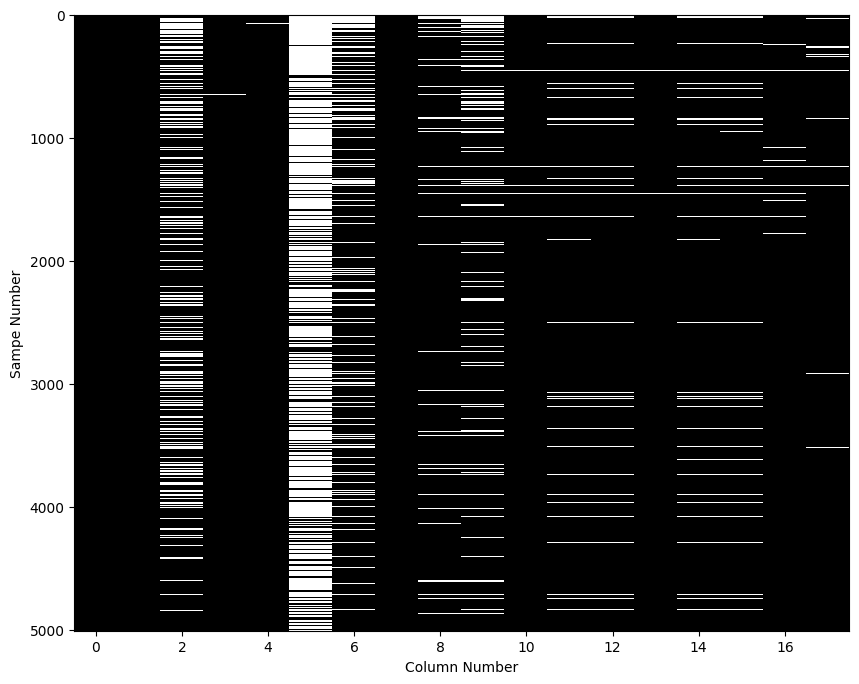

In [41]:
#Chequeamos el grafico con la cantidad de nulos
plt.figure(figsize=(10, 8))
plt.imshow(avion_df.isna(), aspect='auto',
           interpolation='nearest', cmap='gray')
plt.xlabel('Column Number')
plt.ylabel('Sampe Number') 

<Axes: title={'center': 'Porcentaje de valores faltantes por columna'}, ylabel='Relación de valores perdidos por columna'>

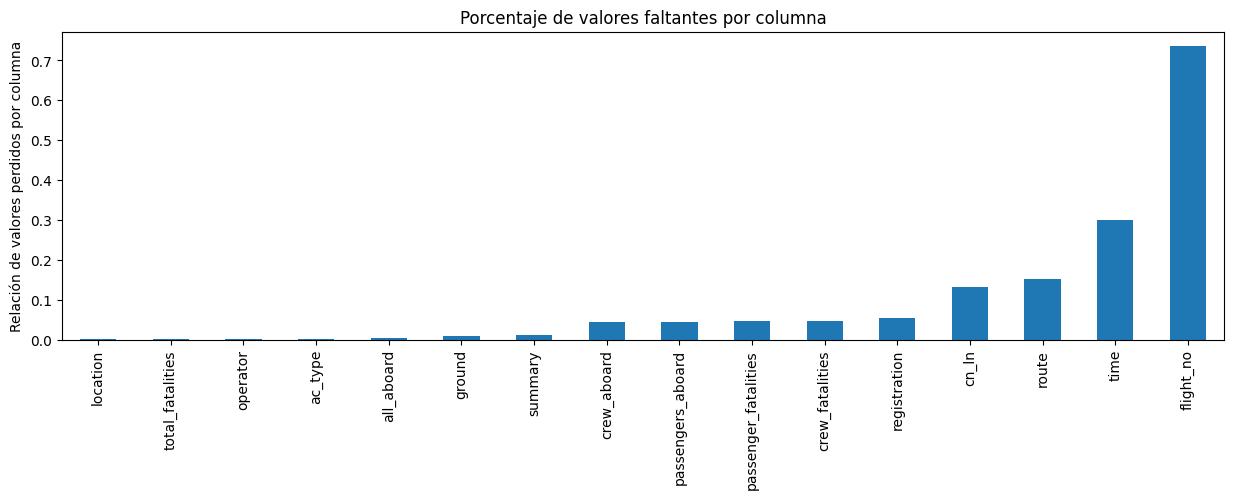

In [42]:
#Realizamos un gráfico de barras para observar la columna con mas valores faltantes
mask = avion_df.isna().any(axis=0)
avion_df.isna().mean()[mask].sort_values().plot(
    kind='bar', figsize=(15, 4),
    title='Porcentaje de valores faltantes por columna',
    ylabel='Relación de valores perdidos por columna'
)

In [45]:
#Debido a la falta de datos e importancia, decidímos eliminar las siguientes columnas:
avion_df = avion_df.drop(['flight_no', 'cn_ln', 'registration', 'Unnamed: 0'], axis=1)

In [46]:
avion_df.head()

,date,time,location,operator,route,ac_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [47]:
# En caso de que haya repetidos, eliminamos los duplicados
avion_df = avion_df.drop_duplicates()

In [48]:
#Chequeamos la información del dataset
avion_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  5008 non-null   object
 1   time                  3504 non-null   object
 2   location              5003 non-null   object
 3   operator              4998 non-null   object
 4   route                 4246 non-null   object
 5   ac_type               4995 non-null   object
 6   all_aboard            4991 non-null   object
 7   passengers_aboard     4787 non-null   object
 8   crew_aboard           4789 non-null   object
 9   total_fatalities      5000 non-null   object
 10  passenger_fatalities  4773 non-null   object
 11  crew_fatalities       4773 non-null   object
 12  ground                4964 non-null   object
 13  summary               4949 non-null   object
dtypes: object(14)
memory usage: 586.9+ KB


In [49]:
#Modificamos el tipo de dato al formato correcto
avion_df['date'] = pd.to_datetime(avion_df['date'])
avion_df[['all_aboard', 'crew_aboard', 'passengers_aboard', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities']] = avion_df[['all_aboard', 'crew_aboard', 'passengers_aboard', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities']].astype('float').astype('Int64')

In [50]:
avion_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5008 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  5008 non-null   datetime64[ns]
 1   time                  3504 non-null   object        
 2   location              5003 non-null   object        
 3   operator              4998 non-null   object        
 4   route                 4246 non-null   object        
 5   ac_type               4995 non-null   object        
 6   all_aboard            4991 non-null   Int64         
 7   passengers_aboard     4787 non-null   Int64         
 8   crew_aboard           4789 non-null   Int64         
 9   total_fatalities      5000 non-null   Int64         
 10  passenger_fatalities  4773 non-null   Int64         
 11  crew_fatalities       4773 non-null   Int64         
 12  ground                4964 non-null   object        
 13  summary           

In [51]:
#Vamos a calcular medidas estadisticas para obtener más informacion
avion_df.describe()

,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities
count,4991.0,4787.0,4789.0,5000.0,4773.0,4773.0
mean,31.121218,26.877376,4.519524,22.294,18.940708,3.587262
std,45.479965,44.035342,3.758072,35.000385,34.06519,3.177315
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.0,3.0,2.0,4.0,1.0,2.0
50%,16.0,12.0,4.0,11.0,7.0,3.0
75%,35.0,30.0,6.0,25.0,21.0,5.0
max,644.0,614.0,83.0,583.0,560.0,43.0


<function matplotlib.pyplot.show(close=None, block=None)>

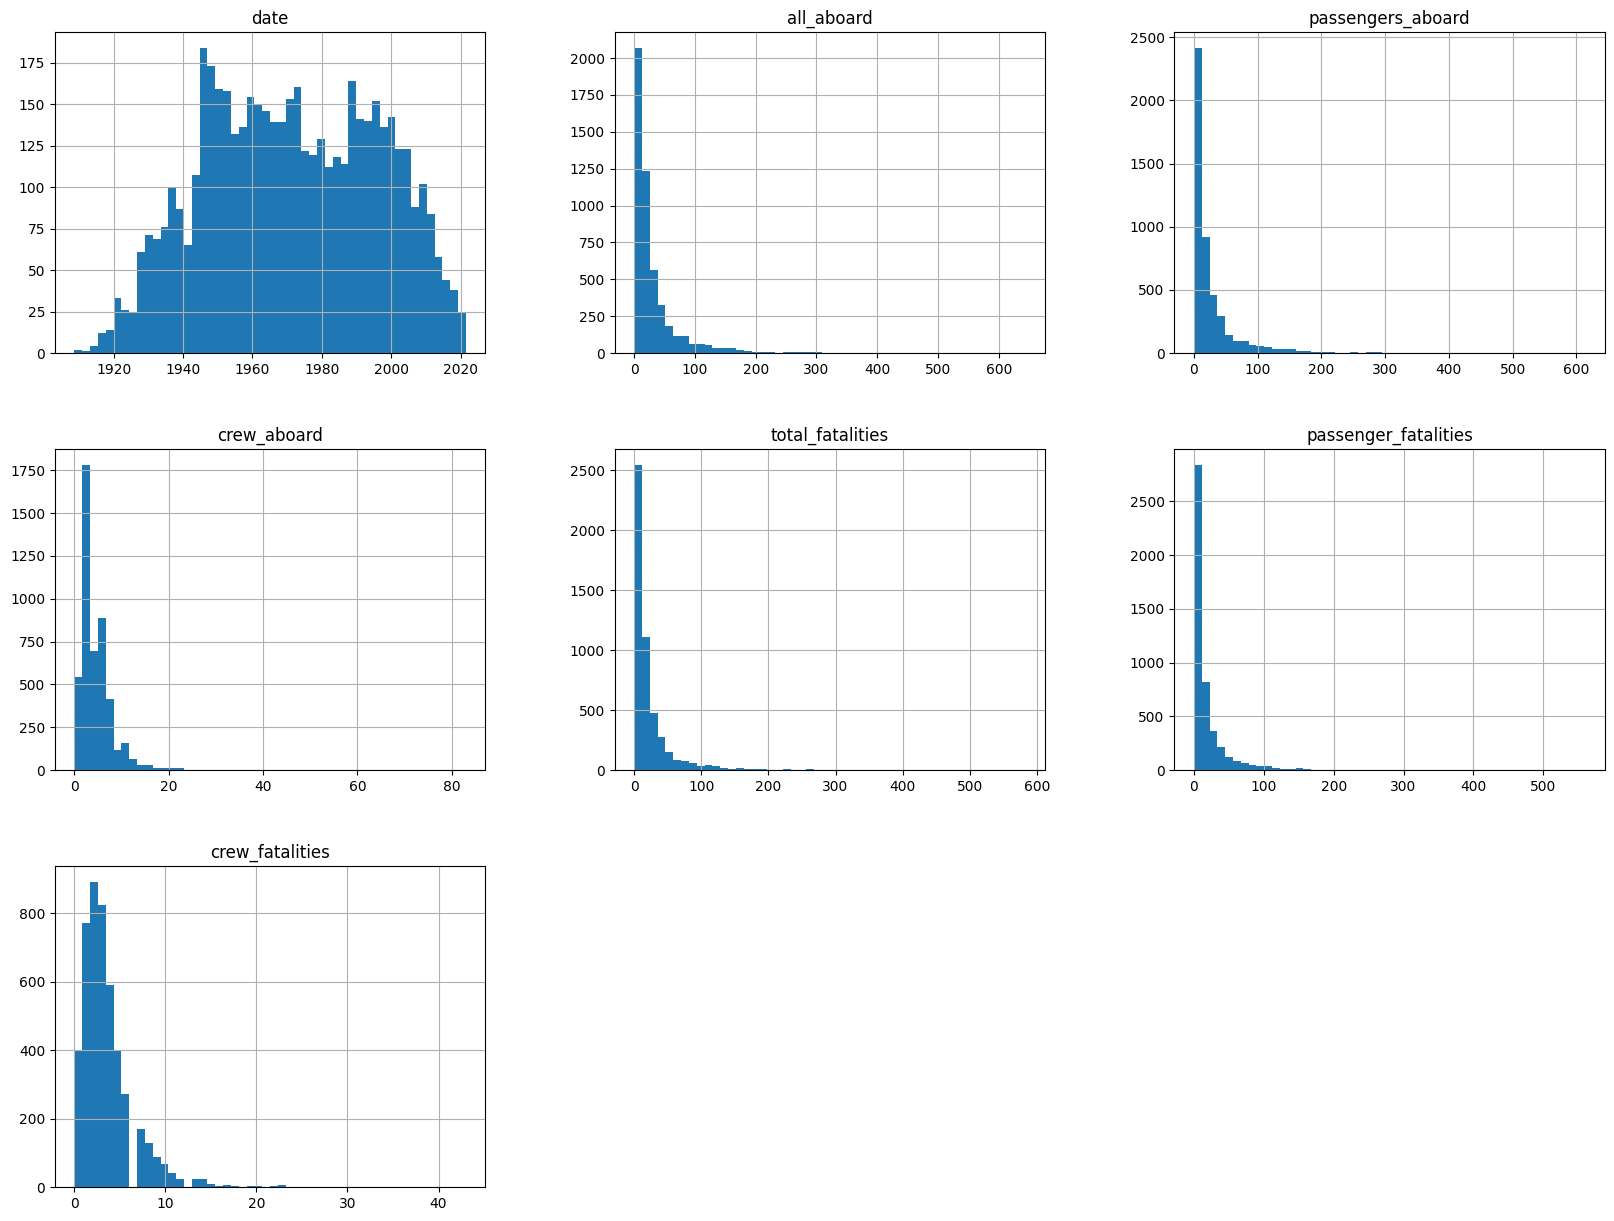

In [52]:
avion_df.hist(bins = 50, figsize = (20,15))
plt.show

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7716\1354934490.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = avion_df.corr()


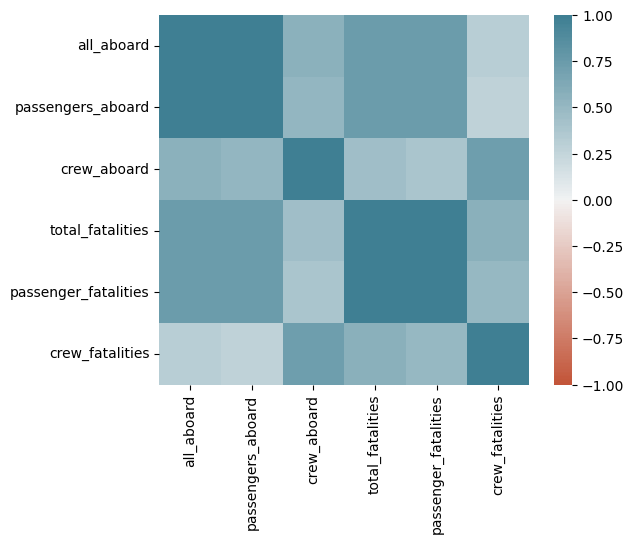

In [54]:
# Hacemos un mapa de calor para encontrar una relacion entre las variables
import seaborn as sns #Importamos la librearia seaborn

#Llamamos la función 
corr_matrix = avion_df.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
#plt.figure(figsize=(13,4))
#sns.countplot(avion_df['route'].dropna(), order=avion_df['route'].value_counts().index)

In [58]:
#Exportamos el datasets con sus modificaciones 
avion_df.to_csv('AccidentesAereos.csv', index=False)
